# **Анализ экологических проблем - Апрель 2025**

In [1]:
#импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Обзор данных
У нас есть данные завода по производству полезного полимера.

*Таблица зависимости вредных выбросов от производственных показателей:*

In [66]:
df = pd.read_csv('analysing_environmental_issues.csv', sep= ',', encoding='UTF-8', decimal=',', na_values=' ')
df

,DateTime,stage_1_output_konv_avd,stage_2_input_water_sum,stage_2_output_bottom_pressure,stage_2_output_bottom_temp,stage_2_output_bottom_temp_hum_steam,stage_2_output_bottom_vacuum,stage_2_output_top_pressure,stage_2_output_top_pressure_at_end,stage_2_output_top_temp,...,stage_3_output_temp_hum_steam,stage_3_output_temp_top,stage_4_input_overheated_steam,stage_4_input_polymer,stage_4_input_steam,stage_4_input_water,stage_4_output_danger_gas,stage_4_output_dry_residue_avg,stage_4_output_product,work_shift
0,2021-01-28 18:00:00,67.83,92.99,474.18,76.84,97.52,49.94,361.5,252.04,97.48,...,108.65,45.59,156.67,19.08,5.92,356.05,NaN,21.48,47.03,2.0
1,2021-01-28 19:00:00,67.83,91.82,473.68,76.15,97.82,48.55,354.75,244.87,97.66,...,108.71,45.89,156.76,19.15,5.94,357.69,NaN,21.48,45.05,2.0
2,2021-01-28 20:00:00,67.83,90.65,473.17,75.46,98.12,47.15,348.0,237.7,97.85,...,108.76,46.19,156.86,19.23,5.97,359.33,NaN,21.48,43.06,2.0
3,2021-01-28 21:00:00,67.93,90.24,473.59,75.26,97.79,49.33,356.74,249.87,97.5,...,108.63,45.87,156.41,19.36,5.97,339.99,0.16,21.48,46.01,2.0
4,2021-01-28 22:00:00,68.03,89.84,474.0,75.06,97.46,51.51,365.49,262.04,97.15,...,108.51,45.54,155.96,19.49,5.97,320.64,NaN,21.48,48.95,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4395,2023-03-19 12:00:00,67.33,43.32,409.32,82.0,105.65,69.35,771.29,223.71,97.37,...,111.26,41.04,152.9,22.69,4.14,381.37,0.2,21.18,9.17,2.0
4396,2023-03-20 00:00:00,68.83,62.24,377.84,79.82,104.8,61.08,781.76,183.36,97.7,...,110.09,46.4,152.53,21.38,4.15,381.77,0.14,21.08,10.79,2.0
4397,2023-03-20 12:00:00,66.83,61.92,397.95,81.19,105.5,66.26,776.52,227.64,98.31,...,108.65,45.99,152.53,21.78,4.14,391.6,0.2,21.08,9.27,1.0
4398,2023-03-21 01:00:00,70.03,62.8,378.37,79.16,110.5,63.16,845.66,223.15,103.01,...,108.18,47.7,151.8,22.44,3.66,460.04,0.18,22.38,10.11,1.0


## Предобработка данных

Выведем на экран названия столбцов:

In [52]:
df.columns

Index(['DateTime', 'stage_1_output_konv_avd', 'stage_2_input_water_sum',
       'stage_2_output_bottom_pressure', 'stage_2_output_bottom_temp',
       'stage_2_output_bottom_temp_hum_steam', 'stage_2_output_bottom_vacuum',
       'stage_2_output_top_pressure', 'stage_2_output_top_pressure_at_end',
       'stage_2_output_top_temp', 'stage_2_output_top_vacuum',
       'stage_3_input_pressure', 'stage_3_input_soft_water',
       'stage_3_input_steam', 'stage_3_output_temp_hum_steam',
       'stage_3_output_temp_top', 'stage_4_input_overheated_steam',
       'stage_4_input_polymer', 'stage_4_input_steam', 'stage_4_input_water',
       'stage_4_output_danger_gas', 'stage_4_output_dry_residue_avg',
       'stage_4_output_product', 'work_shift'],
      dtype='object')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4400 entries, 0 to 4399
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   DateTime                              4400 non-null   object
 1   stage_1_output_konv_avd               4159 non-null   object
 2   stage_2_input_water_sum               4177 non-null   object
 3   stage_2_output_bottom_pressure        4180 non-null   object
 4   stage_2_output_bottom_temp            4209 non-null   object
 5   stage_2_output_bottom_temp_hum_steam  4223 non-null   object
 6   stage_2_output_bottom_vacuum          4169 non-null   object
 7   stage_2_output_top_pressure           4218 non-null   object
 8   stage_2_output_top_pressure_at_end    4226 non-null   object
 9   stage_2_output_top_temp               4196 non-null   object
 10  stage_2_output_top_vacuum             4205 non-null   object
 11  stage_3_input_pressure        

Числовые данные имеют тип "объект", преобразовываем в числовой формат

In [68]:
 # df[['stage_1_output_konv_avd', 'stage_2_input_water_sum', 'stage_2_output_bottom_pressure']] = df[['stage_1_output_konv_avd', 'stage_2_input_water_sum', 'stage_2_output_bottom_pressure']].astype(float)

In [74]:
df.columns != 'DateTime'

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [88]:
df[[i for i in df.columns if i != 'DateTime']] = df[[i for i in df.columns if i != 'DateTime']].astype(float)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4400 entries, 0 to 4399
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   DateTime                              4400 non-null   object 
 1   stage_1_output_konv_avd               4159 non-null   float64
 2   stage_2_input_water_sum               4177 non-null   float64
 3   stage_2_output_bottom_pressure        4180 non-null   float64
 4   stage_2_output_bottom_temp            4209 non-null   float64
 5   stage_2_output_bottom_temp_hum_steam  4223 non-null   float64
 6   stage_2_output_bottom_vacuum          4169 non-null   float64
 7   stage_2_output_top_pressure           4218 non-null   float64
 8   stage_2_output_top_pressure_at_end    4226 non-null   float64
 9   stage_2_output_top_temp               4196 non-null   float64
 10  stage_2_output_top_vacuum             4205 non-null   float64
 11  stage_3_input_pre

### Пропуски значений
Сначала посчитаем, сколько в таблице пропущенных значений. Для этого достаточно двух методов pandas:

In [50]:
df.isnull().sum()

stage_1_output_konv_avd                  241
stage_2_input_water_sum                  223
stage_2_output_bottom_pressure           220
stage_2_output_bottom_temp               191
stage_2_output_bottom_temp_hum_steam     177
stage_2_output_bottom_vacuum             231
stage_2_output_top_pressure              182
stage_2_output_top_pressure_at_end       174
stage_2_output_top_temp                  204
stage_2_output_top_vacuum                195
stage_3_input_pressure                   236
stage_3_input_soft_water                 213
stage_3_input_steam                      173
stage_3_output_temp_hum_steam            174
stage_3_output_temp_top                  230
stage_4_input_overheated_steam           169
stage_4_input_polymer                    226
stage_4_input_steam                      244
stage_4_input_water                      241
stage_4_output_danger_gas               3466
stage_4_output_dry_residue_avg           160
stage_4_output_product                   160
work_shift

Посчитаем явные дубликаты в таблице одной командой:

In [9]:
df.duplicated().sum()

0

**процент конверсии сырья в мономер** stage_1_output_konv_avd 

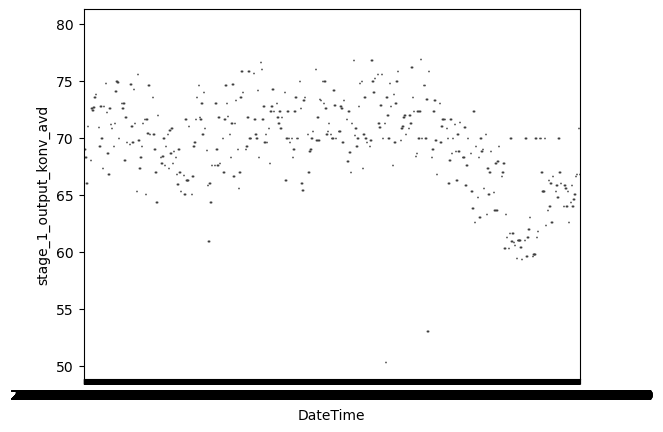

In [23]:
bp = sns.boxplot(x='DateTime', y='stage_1_output_konv_avd', data=df)
#plt.setp(bp.get_xticklabels(), rotation=0)
plt.show()

<Axes: >

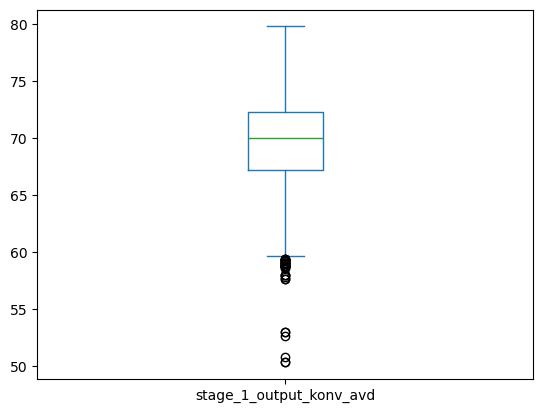

In [35]:
df['stage_1_output_konv_avd'].plot(kind='box')

In [28]:
df['stage_1_output_konv_avd'].describe()

count    4400.000000
mean       69.487591
std         3.922247
min        50.330000
25%        67.230000
50%        70.030000
75%        72.330000
max        79.830000
Name: stage_1_output_konv_avd, dtype: float64

пропуски можно заменить медианой

In [29]:
df.describe()

,stage_1_output_konv_avd,stage_2_input_water_sum,stage_2_output_bottom_pressure
count,4400.000000,4177.000000,4180.000000
mean,69.487591,86.674616,404.030844
std,3.922247,31.155280,62.018933
min,50.330000,19.950000,248.760000
25%,67.230000,64.820000,353.252500
50%,70.030000,82.900000,389.395000
75%,72.330000,105.570000,458.350000
max,79.830000,233.370000,897.290000


In [33]:
df['stage_1_output_konv_avd'].fillna(df['stage_1_output_konv_avd'].mean()).reset_index()


,index,stage_1_output_konv_avd
0,0,67.83
1,1,67.83
2,2,67.83
3,3,67.93
4,4,68.03
...,...,...
4395,4395,67.33
4396,4396,68.83
4397,4397,66.83
4398,4398,70.03


In [15]:
#median_value = df['stage_1_output_konv_avd'].median()
#df['stage_1_output_konv_avd'].fillna(median_value, inplace=True)


C:\Users\orchi\AppData\Local\Temp\ipykernel_12612\404236482.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stage_1_output_konv_avd'].fillna(median_value, inplace=True)


**количество подаваемой суммарной воды** в агрегат stage_2_input_water_sum пропуски заполняем медианой

In [14]:
df['stage_2_input_water_sum'] = df['stage_2_input_water_sum'].fillna(median_value)

NameError: name 'median_value' is not defined

In [ ]:
stage_2_input_water_sum

In [ ]:
# df['stage_1_output_konv_avd'] = df['stage_1_output_konv_avd'].fillna(median_value)

In [ ]:
df[col] = df[col].method(value)

In [37]:
df.isnull().sum()

DateTime                                   0
stage_1_output_konv_avd                    0
stage_2_input_water_sum                    0
stage_2_output_bottom_pressure           220
stage_2_output_bottom_temp               191
stage_2_output_bottom_temp_hum_steam     177
stage_2_output_bottom_vacuum             231
stage_2_output_top_pressure              182
stage_2_output_top_pressure_at_end       174
stage_2_output_top_temp                  204
stage_2_output_top_vacuum                195
stage_3_input_pressure                   236
stage_3_input_soft_water                 213
stage_3_input_steam                      173
stage_3_output_temp_hum_steam            174
stage_3_output_temp_top                  230
stage_4_input_overheated_steam           169
stage_4_input_polymer                    226
stage_4_input_steam                      244
stage_4_input_water                      241
stage_4_output_danger_gas               3466
stage_4_output_dry_residue_avg           160
stage_4_ou